<a href="https://colab.research.google.com/github/IsaMaguire/DataScienceProject2/blob/main/DSProj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimization
%matplotlib inline

# Function for fitting lines to data
def slopeintfunc(x,sl,incpt):
    return sl*x+incpt

First, I had to read the csv file into a dataframe. Then I created another dataframe manually with the measurements for our solar system. 

In [ ]:
# Get file path and read into dataframe
file_path = '/content/drive/MyDrive/DataScience/DSProj2/planets_2023-03-19_no-duplicates.csv' 
data = pd.read_csv(file_path,skiprows=116)
# solar system data frame
SSData = [['Mercury', 449, 5.43], ['Venus', 328, 5.24], ['Earth', 279, 5.51], ['Mars', 226, 3.93], ['Jupiter', 122, 1.33], ['Saturn', 90, 0.687], ['Uranus', 64, 1.27], ['Neptune',51, 1.64]]
df = pd.DataFrame(SSData, columns=['Planet', 'Equilibrium Temp', 'Density'])
# print(df)

Next, I graphed planet equilibrium temperature and insolation flux to show that there is a direct relationship between the two. I used this to justify using equilibrium temperature instead of insulation flux for energy that reaches the planet.

Text(0.5, 1.0, 'Planet Equilibrium Temperature vs Insolation Flux')

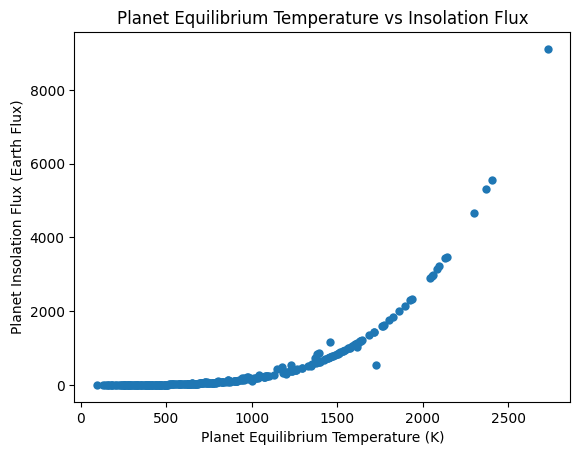

In [57]:
# Create subset of dataframe with eqt and insol
varComp = data[["pl_eqt","pl_insol"]].dropna(how='any')

# Get x and y variables for plot
plEqt0 = varComp["pl_eqt"].values # Planet Equilibrium Temperature (Kelvin)
plInsol0 = varComp["pl_insol"].values # Planet Insolation Flux (jupiter)

plt.scatter(plEqt0, plInsol0, linewidth=0, marker='o')
plt.xlabel("Planet Equilibrium Temperature (K)")
plt.ylabel("Planet Insolation Flux (Earth Flux)")
plt.title("Planet Equilibrium Temperature vs Insolation Flux")
# plt.xscale("log")
# plt.yscale("log")




Below I create another dataframe which only contains the subset with measurements for both equilibrium temperature and density. I then plot the two on histograms to see if they were normally distributed.

(5312, 108)
(389, 2)


Text(0.5, 0, 'Planet Density')

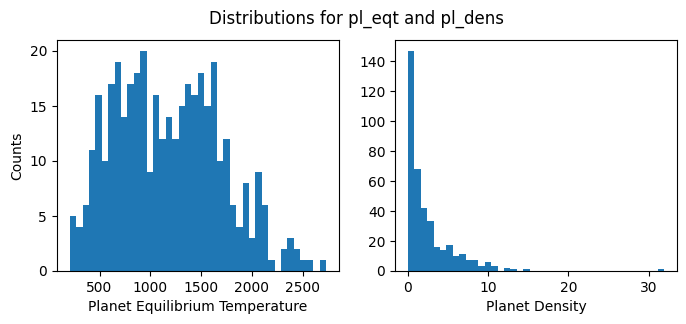

In [ ]:
# New data with only equilibrium temperature, density, and star type
print(data.shape)
newData = data[["pl_eqt","pl_dens"]].dropna(how='any')
newData = newData.sort_values(by=['pl_eqt'], ascending=False)
print(newData.shape)

# Get x and y variables for plot
plEqt = newData["pl_eqt"].values # Planet Equilibrium Temperature (Kelvin)
plDens = newData["pl_dens"].values # Planet Radius (jupiter)

# Histograms to see if variables are normally distributed
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), sharey=False)
f.suptitle('Distributions for pl_eqt and pl_dens')

im1 = ax1.hist(plEqt, bins = 40)
ax1.set_xlabel("Planet Equilibrium Temperature")
ax1.set_ylabel("Counts")
im2 = ax2.hist(plDens, bins = 40)
ax2.set_xlabel("Planet Density")





Time for the scatter plot and correlation values. I put the measurements for our solar system in the same graph so that we could see if there was a similar pattern. 

SignificanceResult(statistic=-0.2499552519383538, pvalue=1.924277928575156e-13)


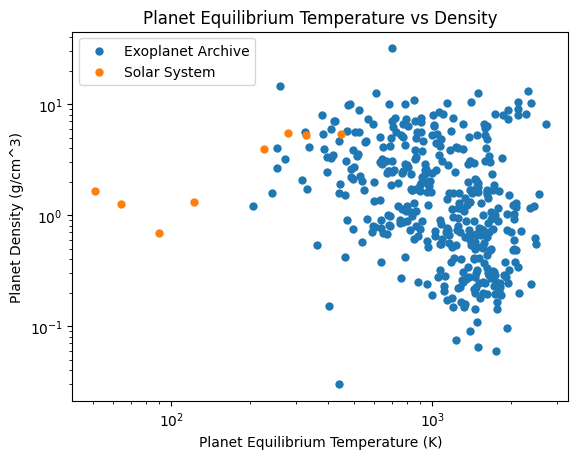

In [ ]:
# Plotting power log scaled scatterplot
Scatter = plt.scatter(plEqt, plDens, linewidth=0, marker='o', label = "Exoplanet Archive") 

# Get values for our solar system
ssEqt = df['Equilibrium Temp'].values
ssDens = df['Density'].values

# Create Scatterplot, label axes, and set scales to log
plt.scatter(ssEqt, ssDens, linewidth=0, marker='o', label = "Solar System")
plt.xlabel("Planet Equilibrium Temperature (K)")
plt.ylabel("Planet Density (g/cm^3)")
plt.title("Planet Equilibrium Temperature vs Density")
plt.xscale("log")
plt.yscale("log")
plt.legend()

# Since we have significant outliers and non-normal distributions, we can't use the pearson r correlation
# Therefore we can use kendalls tau
kCorr = st.kendalltau(plEqt, plDens)
print(kCorr)

Now I grabbed an even smaller subset of data, where the planets now had to be of the same class as our star. I made histograms of these distributions to determine if i should keep using Kendall or switch to pearson. 

(152, 3)


Text(0.5, 0, 'Planet Density')

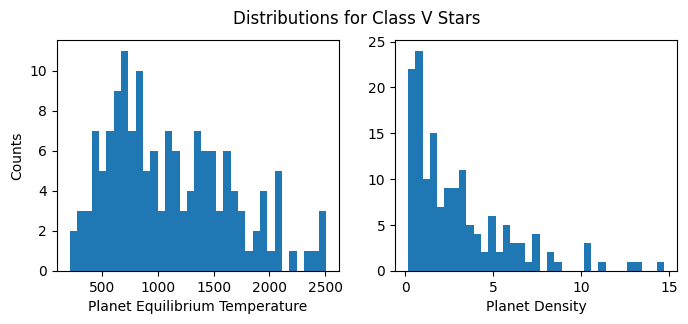

In [ ]:
# New data with only start that are type G with class V
newData2 = data[["pl_eqt","pl_dens","st_spectype"]].dropna(how='any')
newData2 = newData2[newData2['st_spectype'].str.contains("V")]
# print(newData2['st_spectype'])
print(newData2.shape)

# Get x and y values
plEqt2 = newData2["pl_eqt"].values # Planet Equilibrium Temperature (Kelvin)
plDens2 = newData2["pl_dens"].values # Planet Radius (jupiter)

# Histograms to see if variables are normally distributed
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), sharey=False)
f.suptitle('Distributions for Class V Stars')

im1 = ax1.hist(plEqt2, bins = 35)
ax1.set_xlabel("Planet Equilibrium Temperature")
ax1.set_ylabel("Counts")
im2 = ax2.hist(plDens2, bins = 35)
ax2.set_xlabel("Planet Density")

Below I make a scatter plot of the data for class V start, hoping to see a more similar pattern to the one I hypothesized. 

SignificanceResult(statistic=-0.2196824966174748, pvalue=6.030537104459999e-05)


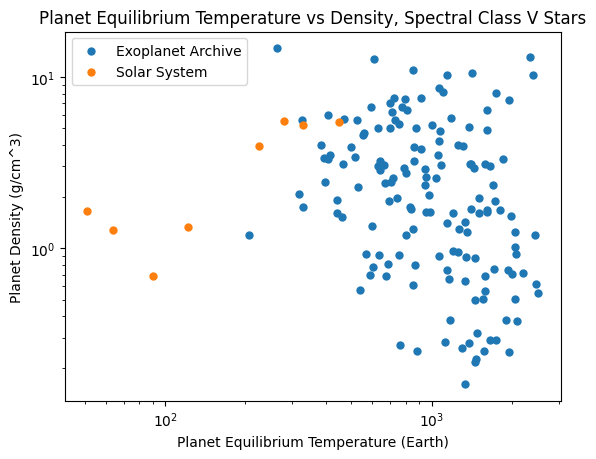

In [ ]:
#Plotting power log scaled scatterplot
Scatter2 = plt.scatter(plEqt2, plDens2,linewidth=0, marker='o', label = "Exoplanet Archive") 
plt.scatter(ssEqt, ssDens, linewidth=0, marker='o', label = "Solar System")
plt.xlabel("Planet Equilibrium Temperature (Earth)")
plt.ylabel("Planet Density (g/cm^3)")
plt.title("Planet Equilibrium Temperature vs Density, Spectral Class V Stars")
plt.xscale("log")
plt.yscale("log")
plt.legend()

kCorr = st.kendalltau(plEqt2, plDens2)
print(kCorr)

In this last part I wanted to see if there were any measured temperatures that were similar to the gas giants of our system. In this histogram for planet equilibrium temperature I noticed that there were many more values in that 0-500 range than there were in my earlier subsets. This led me to believe that we somehow can't get density measurements for colder planets.

In [ ]:
eqts = data[["pl_eqt"]].dropna(how='any')
print(eqts.shape)
denss = data[["pl_dens"]].dropna(how='any')
print(denss.shape)

(820, 1)
(552, 1)


Text(0.5, 0, 'Planet Density')

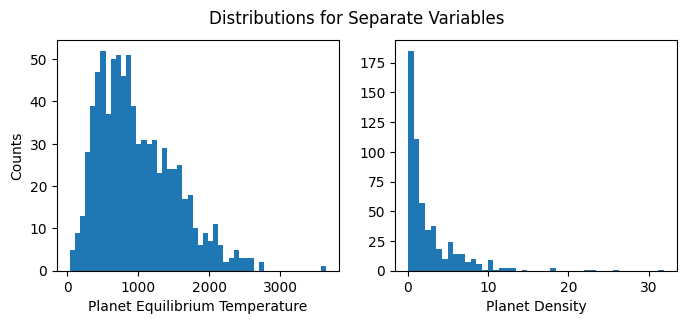

In [ ]:
# Histograms to see if variables are normally distributed
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), sharey=False)
f.suptitle('Distributions for Separate Variables')

im1 = ax1.hist(eqts, bins = 50)
ax1.set_xlabel("Planet Equilibrium Temperature")
ax1.set_ylabel("Counts")
im2 = ax2.hist(denss, bins = 45)
ax2.set_xlabel("Planet Density")